In [40]:
import pandas as pd
import numpy as np
import seaborn as sns

In [41]:
data = pd.read_csv('/kaggle/input/physionet-a-n/physionet_A_N.csv')

# **Reading and Understanding the data**

In [42]:
data.head()

TS_0   TS_1   TS_2   TS_3   TS_4    TS_5   TS_6   TS_7   TS_8   TS_9  ...  \
0 -127.0 -267.0 -241.0 -229.0 -215.0  -201.0 -253.0 -273.0 -226.0 -172.0  ...   
1  -41.0  663.0  -39.0 -113.0  -81.0   -67.0  -45.0   34.0   82.0   62.0  ...   
2    7.0    7.0   12.0   18.0   36.0    80.0    0.0  -19.0  418.0  248.0  ...   
3  128.0  268.0  244.0  209.0  194.0   234.0  203.0  188.0  211.0  228.0  ...   
4   13.0   54.0   80.0   56.0  -36.0  1469.0 -199.0 -180.0 -177.0 -126.0  ...   

   TS_261  TS_262  TS_263  TS_264  TS_265  TS_266  TS_267  TS_268  TS_269  \
0   -29.0   -22.0   -19.0   -22.0   -43.0   -53.0   -23.0    22.0   -31.0   
1   -22.0    42.0   104.0    32.0     2.0     2.0   -13.0   -16.0     6.0   
2   -22.0   -33.0   -31.0   -34.0   -11.0     1.0    -8.0    12.0    62.0   
3   -70.0   -62.0   -44.0   393.0   -74.0   -84.0   -65.0   -30.0    -6.0   
4   -15.0   -37.0   -50.0   -21.0    30.0    17.0  1571.0  -165.0  -201.0   

   CLASS  
0      N  
1      N  
2      N  
3      N  
4      N  

[5 rows x 271 columns]

In [43]:
data['CLASS'].unique()

array(['N', 'A'], dtype=object)

In [44]:
data['CLASS'].value_counts()

N    16030
A     2340
Name: CLASS, dtype: int64

<AxesSubplot:xlabel='CLASS', ylabel='count'>

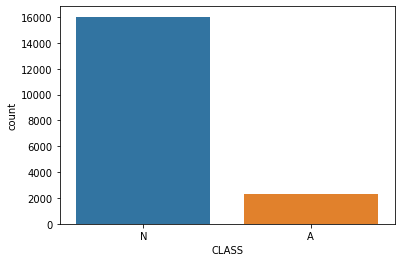

In [45]:
sns.countplot(x=data['CLASS'])

In [46]:
data.describe()

TS_0          TS_1          TS_2          TS_3          TS_4  \
count  18370.000000  18370.000000  18370.000000  18370.000000  18370.000000   
mean       6.460425      5.024823      4.541698      6.391889      6.158356   
std      272.334830    420.495452    402.284830    386.746853    378.025853   
min    -3614.000000  -6466.000000  -5019.000000  -4764.000000  -5952.000000   
25%      -71.000000    -79.000000    -79.000000    -79.000000    -79.000000   
50%       -8.000000     -9.000000     -9.000000     -9.000000    -11.000000   
75%       72.000000     82.000000     82.000000     80.000000     80.000000   
max     3344.000000   5514.000000   6134.000000   6305.000000   6479.000000   

               TS_5          TS_6          TS_7          TS_8          TS_9  \
count  18370.000000  18370.000000  18370.000000  18370.000000  18370.000000   
mean       5.750136      4.165106      3.910996      3.444529      3.132281   
std      364.795591    347.348664    343.027604    337.468859    324.780727   
min    -6422.000000  -5255.000000  -6984.000000  -4687.000000  -5096.000000   
25%      -77.000000    -77.000000    -75.000000    -75.000000    -75.000000   
50%      -10.000000    -10.000000    -10.000000     -9.000000     -8.000000   
75%       79.000000     77.000000     73.000000     73.000000     70.750000   
max     5658.000000   5728.000000   5847.000000   6070.000000   5308.000000   

       ...        TS_260        TS_261        TS_262        TS_263  \
count  ...  18370.000000  18370.000000  18370.000000  18370.000000   
mean   ...      7.016222      8.752041      8.110343     10.027055   
std    ...    198.537713    192.926446    197.262111    199.259975   
min    ...  -3479.000000  -2398.000000  -2790.000000  -3484.000000   
25%    ...    -60.000000    -59.000000    -59.000000    -59.000000   
50%    ...     -9.000000    -10.000000    -10.000000     -9.000000   
75%    ...     53.000000     52.000000     52.000000     53.000000   
max    ...   3109.000000   4482.000000   5790.000000   5405.000000   

             TS_264        TS_265        TS_266        TS_267        TS_268  \
count  18370.000000  18370.000000  18370.000000  18370.000000  18370.000000   
mean       7.581383      7.465705      9.962929      9.961132      8.139575   
std      196.717561    199.346913    199.376930    197.770150    197.604523   
min    -3402.000000  -3597.000000  -3756.000000  -3384.000000  -3154.000000   
25%      -60.000000    -60.000000    -59.000000    -59.000000    -59.000000   
50%      -10.000000    -10.000000    -10.000000    -10.000000     -9.000000   
75%       53.000000     52.000000     55.000000     55.000000     53.000000   
max     4082.000000   4027.000000   4170.000000   3503.000000   3908.000000   

             TS_269  
count  18370.000000  
mean       8.737180  
std      201.765898  
min    -4153.000000  
25%      -58.000000  
50%      -10.000000  
75%       53.000000  
max     3190.000000  

[8 rows x 270 columns]

# Answer (a)(1):

So there are 270 variables here, out of which only the variable named *'class'* is **categorical**, while rest of the variables represent a quantitative value with the values that cannout be fitted in a pool of numbers, hence other variables are **continous**.
They are not ordinal because the numbers (or values) do not represent a ordered class or label.



In [47]:
data.isna().sum()

TS_0      0
TS_1      0
TS_2      0
TS_3      0
TS_4      0
         ..
TS_266    0
TS_267    0
TS_268    0
TS_269    0
CLASS     0
Length: 271, dtype: int64

In [48]:
import matplotlib.pyplot as plt

def visualize(data2 , name=None):
    fig , axis = plt.subplots(2,3,figsize=(15, 7))
    if name: fig.suptitle(name)
    else: fig.suptitle('Time Plots')
    assert data2.shape[0] == 6 , "Provide valid Data"
    j,k =0,0
    for i in range(6):
        if j>1: j=0
        if k>2: k=0
        axis[j,k].plot(range(0,270) , data2.iloc[i][:-1])
        j+=1
        k+=1
    for ax in fig.get_axes():
        ax.label_outer()


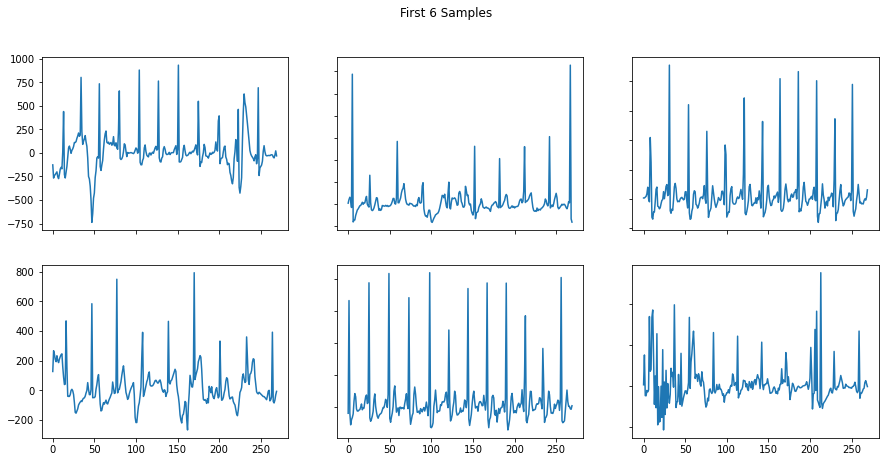

In [49]:
top_6 = data.loc[:5]
visualize(top_6 , 'First 6 Samples')

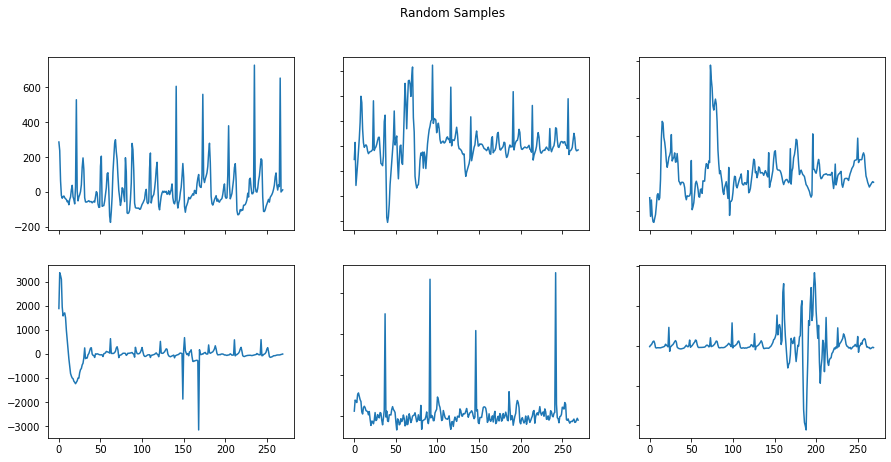

In [50]:
random_6 = data.sample(n=6)
visualize(random_6 , 'Random Samples')


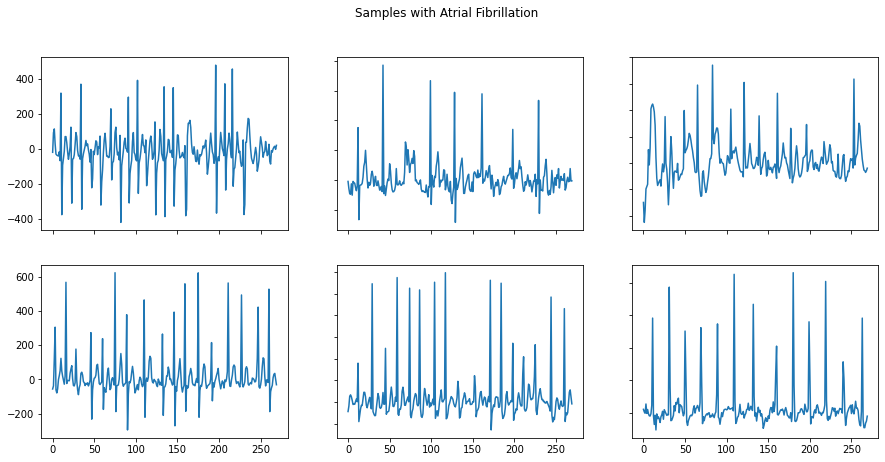

In [51]:
visualize(data[data['CLASS'] == 'A'].sample(6) , 'Samples with Atrial Fibrillation')

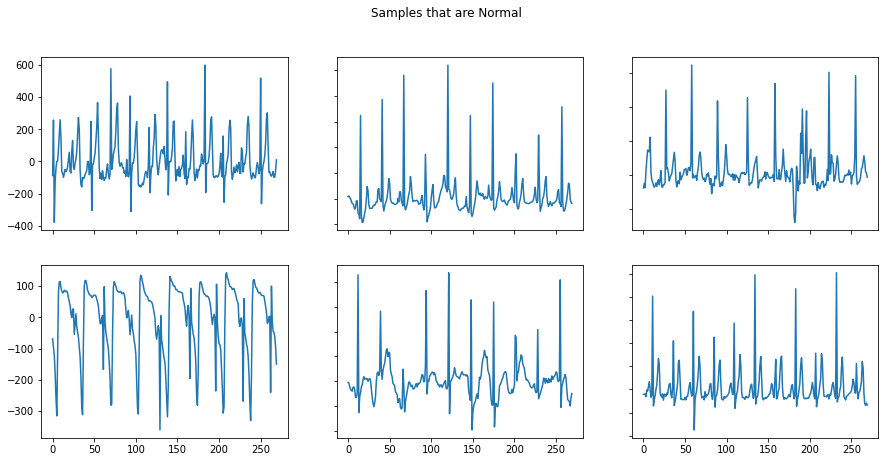

In [52]:
visualize(data[data['CLASS'] == 'N'].sample(6) , 'Samples that are Normal')

These visuals look cyclic for most part with few inconsistencies for some part (especially in Normal Samples) , While the samples with Atrial Fibrillation contains more inconsistencies and deviations from the cyclic pattern. These are the things that first comes to mind when we look at these graphs


# Encoding *CLASS* Category

In [53]:
 data['CLASS']=[1 if data['CLASS'].iloc[i]=='A' else 0 for i in range(data.shape[0])]

**1 for Atrial Fibrillation
, 0 for Normal**

In [54]:
data['CLASS'].value_counts()

0    16030
1     2340
Name: CLASS, dtype: int64

# Lets Start with a simple correlation matrix

In [55]:
data.corr()


TS_0      TS_1      TS_2      TS_3      TS_4      TS_5      TS_6  \
TS_0    1.000000  0.774116  0.658081  0.573501  0.488359  0.399230  0.341767   
TS_1    0.774116  1.000000  0.814314  0.713349  0.609461  0.495654  0.412432   
TS_2    0.658081  0.814314  1.000000  0.827322  0.709307  0.598654  0.502982   
TS_3    0.573501  0.713349  0.827322  1.000000  0.797920  0.683119  0.569010   
TS_4    0.488359  0.609461  0.709307  0.797920  1.000000  0.778340  0.647611   
...          ...       ...       ...       ...       ...       ...       ...   
TS_266  0.002306 -0.005157 -0.003879 -0.005269 -0.006015 -0.011780 -0.000969   
TS_267 -0.015019 -0.011242 -0.010436 -0.008022 -0.015014 -0.013678 -0.009115   
TS_268 -0.009364 -0.014081 -0.018494 -0.020523 -0.017740 -0.021820 -0.009830   
TS_269  0.005079 -0.007091 -0.003962 -0.011791 -0.001824 -0.006482 -0.003554   
CLASS   0.013327  0.006802  0.004986 -0.001601 -0.007100 -0.004129 -0.005801   

            TS_7      TS_8      TS_9  ...    TS_261    TS_262    TS_263  \
TS_0    0.267005  0.203599  0.151398  ... -0.000474 -0.002553 -0.005670   
TS_1    0.319181  0.259837  0.221407  ... -0.003310 -0.013585 -0.007375   
TS_2    0.373569  0.291723  0.246847  ... -0.002396 -0.010774 -0.000720   
TS_3    0.440328  0.356992  0.295360  ... -0.011074 -0.007285 -0.004593   
TS_4    0.507952  0.389034  0.330747  ... -0.003414  0.000120 -0.000323   
...          ...       ...       ...  ...       ...       ...       ...   
TS_266 -0.001462 -0.002014 -0.000078  ...  0.132820  0.208035  0.265797   
TS_267 -0.014439 -0.015046 -0.016926  ...  0.088261  0.138617  0.200661   
TS_268 -0.010192 -0.006408 -0.005772  ...  0.065448  0.105028  0.146278   
TS_269 -0.000754  0.000206  0.009262  ...  0.037015  0.082243  0.108267   
CLASS   0.009615  0.003411 -0.002722  ... -0.002936  0.003152 -0.008422   

          TS_264    TS_265    TS_266    TS_267    TS_268    TS_269     CLASS  
TS_0    0.003920 -0.016622  0.002306 -0.015019 -0.009364  0.005079  0.013327  
TS_1   -0.003186 -0.007931 -0.005157 -0.011242 -0.014081 -0.007091  0.006802  
TS_2   -0.002831 -0.003122 -0.003879 -0.010436 -0.018494 -0.003962  0.004986  
TS_3   -0.003292 -0.008175 -0.005269 -0.008022 -0.020523 -0.011791 -0.001601  
TS_4   -0.006096 -0.009226 -0.006015 -0.015014 -0.017740 -0.001824 -0.007100  
...          ...       ...       ...       ...       ...       ...       ...  
TS_266  0.356891  0.461129  1.000000  0.455015  0.357502  0.248190 -0.001629  
TS_267  0.282801  0.352347  0.455015  1.000000  0.449342  0.320161 -0.012598  
TS_268  0.222443  0.289592  0.357502  0.449342  1.000000  0.451241 -0.004428  
TS_269  0.155827  0.201631  0.248190  0.320161  0.451241  1.000000  0.005345  
CLASS   0.004556 -0.003373 -0.001629 -0.012598 -0.004428  0.005345  1.000000  

[271 rows x 271 columns]

So the correlation between the adjacent timestamps is high (like TS44 and TS42 are highly correlated) and then it starts to fade as we move further away from selected timestamp (like there's not much correlation between TS70 and TS150)

In [56]:
def rm_high_corr_features(corr_data , m=0.7):
    
    correlated_coloumns = []
    for i in range(len(corr_data.columns)):
        for j in range (i):
            if abs(corr_data.iloc[i,j]) >m:
                correlated_coloumns.append(corr_data.columns[i])
    
    return set(correlated_coloumns)
                

In [57]:
high_columns = rm_high_corr_features(data.corr()) 

In [58]:
list(high_columns)

['TS_11',
 'TS_12',
 'TS_1',
 'TS_6',
 'TS_2',
 'TS_3',
 'TS_5',
 'TS_4',
 'TS_28',
 'TS_8',
 'TS_10',
 'TS_7',
 'TS_13',
 'TS_9']

*Above are the columns that are highly correlated to neartest features. So now I want create a dataset without these coloums.*

In [59]:
condensed_data = data.drop(list(high_columns) , axis=1)
condensed_data.head()

TS_0  TS_14  TS_15  TS_16  TS_17  TS_18  TS_19  TS_20  TS_21  TS_22  ...  \
0 -127.0 -230.0 -266.0 -207.0 -143.0  -39.0   53.0   73.0   39.0   -4.0  ...   
1  -41.0  -18.0   -3.0   17.0  -19.0   -9.0   -9.0   31.0   62.0   73.0  ...   
2    7.0  -18.0   66.0   81.0  -49.0  -53.0  -67.0  -59.0  -32.0   -9.0  ...   
3  128.0   40.0   43.0  469.0  159.0  -39.0  -40.0  -40.0  -28.0    0.0  ...   
4   13.0  -17.0  -13.0    3.0   23.0    0.0   18.0   16.0   57.0   89.0  ...   

   TS_261  TS_262  TS_263  TS_264  TS_265  TS_266  TS_267  TS_268  TS_269  \
0   -29.0   -22.0   -19.0   -22.0   -43.0   -53.0   -23.0    22.0   -31.0   
1   -22.0    42.0   104.0    32.0     2.0     2.0   -13.0   -16.0     6.0   
2   -22.0   -33.0   -31.0   -34.0   -11.0     1.0    -8.0    12.0    62.0   
3   -70.0   -62.0   -44.0   393.0   -74.0   -84.0   -65.0   -30.0    -6.0   
4   -15.0   -37.0   -50.0   -21.0    30.0    17.0  1571.0  -165.0  -201.0   

   CLASS  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 257 columns]

In [60]:
data_y = data['CLASS']
condensed_data_y = condensed_data['CLASS']

In [61]:
data.drop('CLASS' , axis = 1 , inplace=True)
condensed_data.drop('CLASS' , axis = 1 , inplace=True)

Now the new condensed data only contains 257 columns

**Principal Component Analysis**

Lets try to make a dataset with only few principal features. Maybe this can reduce data quality , but if we can get a close enough representation then we could save lot of computational cost and training time.

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


Frist lets standarize both datasets we have got so far

In [63]:
standardize = StandardScaler()
data = pd.DataFrame(standardize.fit_transform(data))
condensed_data = pd.DataFrame(standardize.fit_transform(condensed_data))

In [64]:
data.head()

0         1         2         3         4         5         6    \
0 -0.490073 -0.646933 -0.610384 -0.608662 -0.585051 -0.566772 -0.740386   
1 -0.174277  1.564804 -0.108239 -0.308717 -0.230568 -0.199433 -0.141548   
2  0.001981  0.004697  0.018540  0.030016  0.078943  0.203544 -0.011991   
3  0.446299  0.625411  0.595262  0.523892  0.496915  0.625710  0.572452   
4  0.024014  0.116473  0.187579  0.128274 -0.111525  4.011259 -0.584918   

        7         8         9    ...       260       261       262       263  \
0 -0.807278 -0.679917 -0.539247  ... -0.166302 -0.195686 -0.152645 -0.145678   
1  0.087718  0.232785  0.181259  ... -0.478593 -0.159402  0.171805  0.471623   
2 -0.066792  1.228459  0.753968  ... -0.171338 -0.159402 -0.208410 -0.205903   
3  0.536674  0.615053  0.692387  ... -0.030303 -0.408208 -0.355427 -0.271146   
4 -0.536155 -0.534714 -0.397609  ... -0.035340 -0.123118 -0.228688 -0.301258   

        264       265       266       267       268       269  
0 -0.150379 -0.253162 -0.315807 -0.166668  0.070144 -0.196952  
1  0.124134 -0.027419 -0.039940 -0.116103 -0.122164 -0.013566  
2 -0.211382 -0.092634 -0.044956 -0.090821  0.019537  0.263990  
3  1.959302 -0.408674 -0.471296 -0.379042 -0.193015 -0.073043  
4 -0.145295  0.113044  0.035296  7.893412 -0.876216 -1.039536  

[5 rows x 270 columns]

In [65]:
data.describe()

0             1             2             3             4    \
count  1.837000e+04  1.837000e+04  1.837000e+04  1.837000e+04  1.837000e+04   
mean   9.283084e-18 -5.415132e-18  4.254747e-18 -3.481157e-18  3.481157e-18   
std    1.000027e+00  1.000027e+00  1.000027e+00  1.000027e+00  1.000027e+00   
min   -1.329451e+01 -1.538947e+01 -1.248786e+01 -1.233500e+01 -1.576167e+01   
25%   -2.844386e-01 -1.998288e-01 -2.076737e-01 -2.208013e-01 -2.252774e-01   
50%   -5.309941e-02 -3.335400e-02 -3.366288e-02 -3.979944e-02 -4.539061e-02   
75%    2.406646e-01  1.830633e-01  1.925512e-01  1.903315e-01  1.953402e-01   
max    1.225561e+01  1.310151e+01  1.523703e+01  1.628657e+01  1.712321e+01   

                5             6             7             8             9    \
count  1.837000e+04  1.837000e+04  1.837000e+04  1.837000e+04  1.837000e+04   
mean   2.320771e-18 -8.122699e-18  1.547181e-18  1.547181e-18  7.349108e-18   
std    1.000027e+00  1.000027e+00  1.000027e+00  1.000027e+00  1.000027e+00   
min   -1.762062e+01 -1.514129e+01 -2.037183e+01 -1.389927e+01 -1.570066e+01   
25%   -2.268459e-01 -2.336768e-01 -2.300490e-01 -2.324560e-01 -2.405759e-01   
50%   -4.317641e-02 -4.078177e-02 -4.055468e-02 -3.687709e-02 -3.427723e-02   
75%    2.008025e-01  2.096938e-01  2.014149e-01  2.061149e-01  2.082007e-01   
max    1.549472e+01  1.647909e+01  1.703434e+01  1.797713e+01  1.633413e+01   

       ...           260           261           262           263  \
count  ...  1.837000e+04  1.837000e+04  1.837000e+04  1.837000e+04   
mean   ... -2.707566e-18 -3.771253e-18 -3.094361e-18 -1.933976e-18   
std    ...  1.000027e+00  1.000027e+00  1.000027e+00  1.000027e+00   
min    ... -1.755894e+01 -1.247531e+01 -1.418512e+01 -1.753549e+01   
25%    ... -3.375583e-01 -3.511902e-01 -3.402182e-01 -3.464265e-01   
50%    ... -8.067313e-02 -9.720052e-02 -9.181102e-02 -9.549119e-02   
75%    ...  2.316186e-01  2.241742e-01  2.225002e-01  2.156686e-01   
max    ...  1.562458e+01  2.318692e+01  2.931149e+01  2.707578e+01   

                264           265           266           267           268  \
count  18370.000000  1.837000e+04  1.837000e+04  1.837000e+04  1.837000e+04   
mean       0.000000  8.702891e-18 -7.735903e-19 -6.575518e-18  1.469822e-17   
std        1.000027  1.000027e+00  1.000027e+00  1.000027e+00  1.000027e+00   
min      -17.332841 -1.808186e+01 -1.888917e+01 -1.716161e+01 -1.600280e+01   
25%       -0.343555 -3.384429e-01 -3.459016e-01 -3.487028e-01 -3.397767e-01   
50%       -0.089376 -8.761701e-02 -1.001293e-01 -1.009337e-01 -8.673912e-02   
75%        0.230889  2.234071e-01  2.258952e-01  2.277396e-01  2.270274e-01   
max       20.712587  2.016406e+01  2.086576e+01  1.766259e+01  1.973622e+01   

                269  
count  1.837000e+04  
mean  -8.896289e-18  
std    1.000027e+00  
min   -2.062713e+01  
25%   -3.307744e-01  
50%   -9.286847e-02  
75%    2.193831e-01  
max    1.576753e+01  

[8 rows x 270 columns]

Now lets determine how many dimensions should our PCA output must have.We will use numpy svd to calculate 'S' vector and find the minimum value of k for which the ratio of summission till k to summission till the end will be greater than 0.99

In [68]:
U, S ,V = np.linalg.svd(data)
S

array([409.18952924, 383.20085042, 372.5790392 , 363.70321358,
       358.28047204, 347.43269131, 344.46002562, 335.98764267,
       330.31913348, 322.4476994 , 321.23075596, 310.27202512,
       303.03962183, 296.72058558, 282.82708211, 270.21584492,
       259.07281782, 248.28317975, 236.70991479, 228.04671061,
       213.31327133, 206.58429787, 200.53267706, 193.05783831,
       187.81705189, 178.2031371 , 174.491624  , 173.1060018 ,
       168.15577906, 165.44110731, 162.20716576, 160.55839126,
       158.7726911 , 157.57269028, 155.79946502, 154.62132311,
       151.53761658, 151.04429832, 149.44422963, 149.29527948,
       148.2811625 , 147.21369443, 145.90659912, 145.66082428,
       144.8208339 , 143.92305422, 142.57252026, 141.26648615,
       140.99868209, 140.59779411, 140.41446178, 139.53304374,
       138.72694751, 138.21898399, 137.72233857, 137.13707005,
       137.01468892, 136.47389653, 135.22249683, 134.0870426 ,
       133.71351173, 133.50976321, 132.71155404, 132.24

In [70]:
len(S)

270

In [69]:
k = 1
total_sum = sum(S)
for i in S:
    current_sum = sum(S[:k-1])
    if (current_sum/total_sum)>0.99:
        print(k)
        break
    else:
        k+=1

266


Since there arent much difference in dimensions between actual dataset and proposed number of dimensions with PCA,this means there are very few redundant features i.e 4. So its better if we dont continue with the principal component analysis with this one since we are having similar number  of dimensions either way.

# **Preprocessing**

The following process are done on the data for making it suitable to training:

* Encoding 'CLASS' Coloumn
* Standardising the coloumn
* splitting X and Y

# **Saving the dataset**

In [71]:
data.to_csv('X_Data.csv')
data_y.to_csv('Y_Data.csv')
condensed_data.to_csv('Cond_X_Data.csv')
condensed_data_y.to_csv('Cond_Y_Data.csv')

This is the end of processing and understanding the dataset